In [2]:
import cv2
import numpy
import time
import uuid
import os

In [3]:
classes = {'papa':0,
           'akshita':1,
           'aaditya':2}

In [4]:
#collecting images

In [5]:
img_folder_pth = os.path.join('data','aaditya')
img_num = 19

In [6]:
os.listdir('data')

['akshita', 'mummy', 'papa']

In [7]:
# cap=cv2.VideoCapture(0)
# for i in range(img_num):
#     print('Collecting image number {}'.format(i))
#     ret,frame=cap.read()

#     imgname=os.path.join(img_folder_pth,f'{str(uuid.uuid1())}.jpg')
#     cv2.imwrite(imgname,frame)
#     cv2.imshow('COLLECTING',frame)
#     time.sleep(0.5)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
eg=cv2.imread('D:/vs/jupyter/Source_files/Family_classifier/data/akshita/20230817_000824_003_saved.jpg')
#done for removing extra colour features.
eg=cv2.cvtColor(eg,cv2.COLOR_RGB2GRAY)
print(eg.shape)
plt.imshow(eg,cmap='gray')

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [12]:
face = cv2.CascadeClassifier('D:/vs/jupyter/Source_files/Family_classifier/haarcascade_frontalface_default.xml')
eye  = cv2.CascadeClassifier('D:/vs/jupyter/Source_files/Family_classifier/haarcascade_eye.xml')

In [13]:
eg_face = face.detectMultiScale(eg,1.3,5)
eg_face

()

TypeError: Image data of dtype object cannot be converted to float

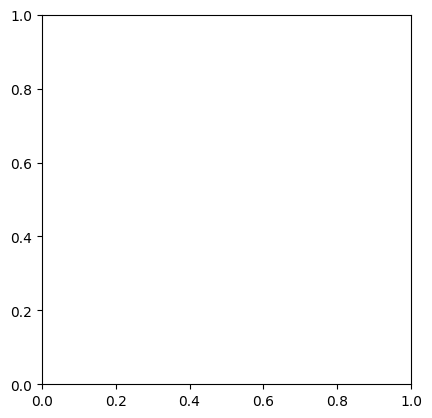

In [14]:
eg_rect=cv2.rectangle(eg,(292,156),(292+178,292+178),(255,0,0),2)
plt.imshow(eg_rect)

In [15]:
def cropper(imgs_pth):
    img = cv2.imread(imgs_pth)
    # img = cv2.resize(img,(200,200))
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    face_detected = face.detectMultiScale(gray_img,1.3,5)
    for (x,y,w,h) in face_detected:
        aoi_gray = gray_img[y:y+h,x:x+w]
        aoi_color = img[y:y+h,x:x+w]
        eyes = eye.detectMultiScale(aoi_gray)
        if len(eyes) >=2 :
            return aoi_color

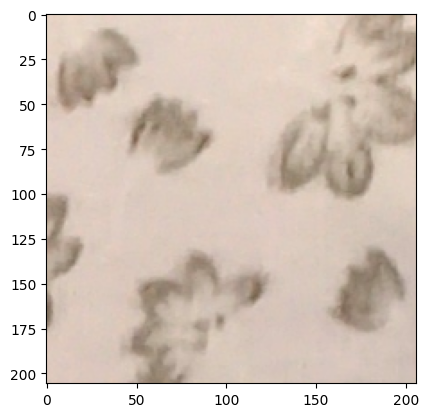

In [17]:
img = cropper('D:/vs/jupyter/Source_files/Family_classifier/data/akshita/20230816_235254.jpg')
plt.imshow(img)

In [19]:
pth_for_data = 'data'

In [20]:
img_dirs = []

for i in os.scandir(pth_for_data):
    img_dirs.append(i.path)

In [21]:
img_dirs

['data\\akshita', 'data\\mummy', 'data\\papa']

In [22]:
crp_pth = 'data/cropped'

In [23]:

for img_dir in img_dirs:
    i=0
    name = img_dir.split('\\')[-1]
    print(name)

    for img in os.scandir(img_dir):
        aoi = cropper(img.path)
        if aoi is not None:
            crp_folder = crp_pth + name
            if not os.path.exists(crp_folder):
                os.makedirs(crp_folder)
                print("Generating cropped images in folder: ",crp_folder)
            
            crp_file_name = name+str(i)+'.png'
            crp_file_dir = crp_folder+'/'+crp_file_name
            cv2.imwrite(crp_file_dir,aoi)
            i+=1


akshita
Generating cropped images in folder:  data/croppedakshita
mummy
Generating cropped images in folder:  data/croppedmummy
papa
Generating cropped images in folder:  data/croppedpapa
